Python libaries:
- [fhir-py](https://github.com/beda-software/fhir-py)

Talk about using Medical Record Number (in a NHS Trust) and NHS Number for out of area queries.

http://127.0.0.1:32783/fhir/r4/Patient?identifier=eea1d993-2406-4d74-b45e-65b387cd17c2

In [10]:
from fhirpy import SyncFHIRClient
from fhir.resources.observation import Observation
client = SyncFHIRClient(url='http://localhost:32783/fhir/r4', extra_headers={})

# find the patient via identifer - patient id will vary by instance

patients_resources = client.resources('Patient')
pats = patients_resources.search(identifier='https://github.com/synthetichealth/synthea|eea1d993-2406-4d74-b45e-65b387cd17c2')
patientFHIR = pats.first()

patient = patientFHIR.id

print('patient id = ',patient)

patient id =  759930


Show REST query i.e. http://127.0.0.1:32783/fhir/r4/Observation?code=29463-7&patient=20625

In [28]:

obx_resources = client.resources('Observation')

#results = obx_resources.search(patient=patient, category='vital-signs' ).limit(100)

vital_signs = ["29463-7", "8302-2", "85354-9"]
for loinc in vital_signs:
    results = obx_resources.search(patient=patient, code=loinc)
    first_result = results.first()
    if first_result is not None:
        obxs = Observation.model_validate(first_result.serialize())
        print(obxs.code.coding[0].display)

    for i in results:
        if hasattr(i, 'valueQuantity') and i.valueQuantity is not None:
            print(round(i.valueQuantity.value, 3), '\t',i.valueQuantity.unit, '\t',  i.effectiveDateTime)
        else:
            # Optionally handle other value types
            if hasattr(i, 'valueString'):
                print(f"String value: {i.valueString}", '\t', i.effectiveDateTime)
            elif hasattr(i, 'valueCodeableConcept'):
                print(f"Coded value: {i.valueCodeableConcept.coding[0].display}", '\t', i.effectiveDateTime)
            elif hasattr(i, 'component'):
                for bp in i.component:
                    #print(bp)
                    print(bp.valueQuantity.value, '\t', bp.valueQuantity.unit, '\t', i.effectiveDateTime)
            else:
                print(f"No value found for observation dated {i.effectiveDateTime}")


Body Weight
55.6 	 kg 	 2015-06-01T23:43:33+00:00
53.8 	 kg 	 2015-08-31T23:43:33+00:00
53.8 	 kg 	 2015-09-28T23:43:33+00:00
53.8 	 kg 	 2015-10-26T23:43:33+00:00
53.8 	 kg 	 2015-11-30T23:43:33+00:00
53.8 	 kg 	 2015-12-21T23:43:33+00:00
53.8 	 kg 	 2015-12-28T23:43:33+00:00
53.8 	 kg 	 2016-01-25T23:43:33+00:00
53.8 	 kg 	 2016-02-08T23:43:33+00:00
53.8 	 kg 	 2016-03-21T23:43:33+00:00
53.8 	 kg 	 2016-04-11T23:43:33+00:00
53.8 	 kg 	 2016-05-16T23:43:33+00:00
53.8 	 kg 	 2016-06-13T23:43:33+00:00
52.7 	 kg 	 2016-07-18T23:43:33+00:00
52.7 	 kg 	 2016-09-05T23:43:33+00:00
52.7 	 kg 	 2016-09-19T23:43:33+00:00
52.7 	 kg 	 2016-12-12T23:43:33+00:00
52.7 	 kg 	 2017-01-16T23:43:33+00:00
52.7 	 kg 	 2017-02-13T23:43:33+00:00
52.7 	 kg 	 2017-03-13T23:43:33+00:00
52.7 	 kg 	 2017-04-10T23:43:33+00:00
52.7 	 kg 	 2017-04-17T23:43:33+00:00
52.7 	 kg 	 2017-05-15T23:43:33+00:00
52.7 	 kg 	 2017-06-12T23:43:33+00:00
50.9 	 kg 	 2017-07-10T23:43:33+00:00
50.9 	 kg 	 2017-09-11T23:43:33+00:00


Body Weight


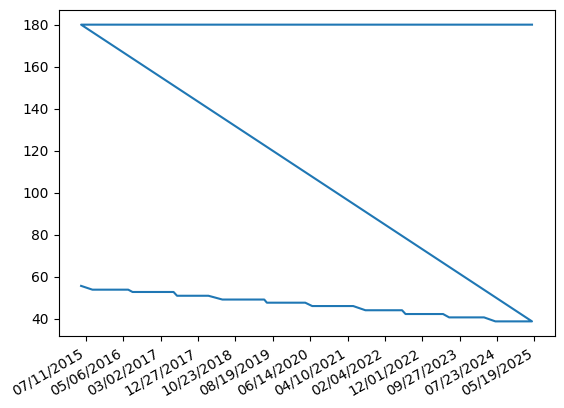

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

try:
    dates = []
    values = []
    for i in results:
        dates += [dt.datetime.fromisoformat(i.effectiveDateTime)]
        values += [i.valueQuantity.value]
    xpoints = np.array(dates)
    ypoints = np.array(values)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
    plt.tick_params(axis='x', labelrotation=45)
    plt.plot(xpoints, ypoints)
    plt.gcf().autofmt_xdate()
    if hasattr(obxs, 'code') and hasattr(obxs.code, 'coding') and len(obxs.code.coding) > 0:
        print(obxs.code.coding[0].display)
    else:
        print("Required FHIR resource properties not found")


    plt.show()

except NameError as e:
    print("Error: FHIR Observation resource not properly initialized")
except Exception as e:
    print(f"An error occurred: {str(e)}")
